<a href="https://colab.research.google.com/github/dretcm/Natural-Language-Processing-ACM/blob/main/NLTK_WITH_PYTHON.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Fundamentos con NLTK**

---


Diapos de curso: [link text](https://static.platzi.com/media/public/uploads/presentacion-fundamentos-de-procesamiento-de-lenguaje-natural-pptx_f8ec9760-22cc-4cbf-ad2e-6f859c3d50d1.pdf)
* NLP (Natural Language Processing): el procesamiento del mensaje enviado (gramatica, lenguaje, etc).
* NLU (Natural Language Understanding): hace que nuestro robot entienda el lenguaje, ya no sería solo el procesamiento del mensaje.

NLP: El procesamiento de lenguaje natural esta más enfocado hacia aplicaciones practicas en la ingeniería

LC : La lingüística computacional estudia el lenguaje desde una perspectiva más científica. (Basada en crear modelos que pueden tener dos enfoques de conocimiento o datos)

El procesamiento de una cadena de **'texto'** necesita una Normalización que incluye los siguientes procesos:

1. Tokenización: Separar en palabras toda la cadena de texto
2. Lematización: Convertir cada una de las palabras a su raiz fundamental
3. Segmentación: Separación en frases (puede ser con las comas)

CORPUS: Colección de muchos textos

CORPORA: Colección de colecciones de texto

## **Como usar NLTK en Colab:**

In [ ]:
import nltk
nltk.download('cess_esp')

[nltk_data] Downloading package cess_esp to /root/nltk_data...
[nltk_data]   Unzipping corpora/cess_esp.zip.


True

## **Expresiones Regulares**


*   Constituyen un lenguaje estandarizado para definir cadenas de búsqueda de texto.
*   Libreria de operaciones con  expresiones regulares de Python [re](https://docs.python.org/3/library/re.html)
*   Reglas para escribir expresiones regulares [Wiki](https://es.wikipedia.org/wiki/Expresión_regular)



In [ ]:
# spanish Corpus: https://mailman.uib.no/public/corpora/2007-October/005448.html
import re
corpus = nltk.corpus.cess_esp.sents() 
print(corpus)
print(len(corpus))

In [ ]:
flatten = [w for l in corpus for w in l]
print(flatten[:20])
print(len(flatten))

**Estructura de la funcion re.search()**
```
# Determina si el patron de búsqueda p esta contenido en la cadena s
re.seach(p, s)  # True si esta, caso contrario False
```



![link text](https://static.platzi.com/media/user_upload/expresiones%20regulares%202-2561a4a3-7e70-46d2-b89f-ae707d537f97.jpg)

In [ ]:
# Meta-caracteres básicos
arr = [w for w in flatten if re.search('es', w)]
arr[:5], len(arr)

(['estatal', 'jueves', 'empresa', 'centrales', 'francesa'], 14814)

In [ ]:
arr = [w for w in flatten if re.search('es$', w)]  # para que 'es' aparesca solo al final
arr2 = [w for w in flatten if re.search('^es', w)] # para que solo filtre los 'es' al principio
arr[:5], arr2[:5]

(['jueves', 'centrales', 'millones', 'millones', 'dólares'],
 ['estatal', 'es', 'esta', 'esta', 'eso'])

In [ ]:
arr = [w for w in flatten if re.search('^..j..t..$', w)]
arr2 = [w for w in flatten if re.search('^..re.d..$', w)]
arr, arr2

(['tajantes'],
 ['aprender',
  'aprender',
  'Aprender',
  'aprender',
  'aprendiz',
  'aprendió',
  'aprendiz'])

In [ ]:
#Rangos [a-z], [A-Z], [0-9]
arr = [w for w in flatten if re.search('^[ghi][mno][jlk][def]$', w)]  # una palabra de 4 letras que contenga esos rangos
arr

['golf', 'golf']

In [ ]:
arr = [w for w in flatten if re.search('^[ghi]', w)]  # palabras que comienzen en 'g, h' y i'.
print(arr)

In [ ]:
arr = [w for w in flatten if re.search('^[123][0][0]$', w)] 
arr

['100',
 '200',
 '200',
 '300',
 '100',
 '300',
 '300',
 '100',
 '300',
 '300',
 '100',
 '100',
 '200',
 '100',
 '200',
 '200',
 '100',
 '100',
 '200',
 '200',
 '200',
 '200',
 '100',
 '100',
 '200',
 '200',
 '300',
 '200']

In [ ]:
#Clausuras 
# * (Kleene closures) 0 o mas veces
# + 1 o mas veces

arr = [w for w in flatten if re.search('^(no)*', w)] # 0 veces o más veces
arr[:10]

['El',
 'grupo',
 'estatal',
 'Electricité_de_France',
 '-Fpa-',
 'EDF',
 '-Fpt-',
 'anunció',
 'hoy',
 ',']

In [ ]:
arr = [w for w in flatten if re.search('no+', w)]  # 1 vez o más veces
arr[:10]

['norte',
 'no',
 'no',
 'noche',
 'no',
 'no',
 'gobierno',
 'notificación',
 'Unión_Fenosa_Inversiones',
 'italiano']

In [ ]:
# uso de '{}'
arr = [w for w in flatten if re.search('^[0-9]{3}$', w)]  # [en el rango de..'0-9'] {numero de veces '3'}
arr[:10]

['495', '194', '186', '495', '134', '247', '118', '108', '118', '900']

#**2. Normalización de Texto** (como aplicación de las expresiones regulares)

In [ ]:
print('Mucho \n Texto')

Mucho 
 Texto


In [ ]:
# raw  ->  'r'  : interpretara todo como texto plano, incluso caracteres especiales
print(r'Mucho \n Texto')

Mucho \n Texto


## **Tokenización:** Es el proceso mediante el cual se sub-divide una cadena de texto en unidades linguísticas minimas (palabras)


In [ ]:
texto = """ Cuando sea el rey del mundo  (imaginaba él en su cabeza) no tendré que  preocuparme por estas bobadas. 
            Era solo un niño de 7 años, pero pensaba que podría ser cualquier cosa que su imaginación le permitiera visualizar en su cabeza ..."""
print(texto)

 Cuando sea el rey del mundo  (imaginaba él en su cabeza) no tendré que  preocuparme por estas bobadas. 
            Era solo un niño de 7 años, pero pensaba que podría ser cualquier cosa que su imaginación le permitiera visualizar en su cabeza ...


In [ ]:
# Caso 1: tokenizacion más simple: por espacios vacios !
print(re.split(r' ', texto)) # o podemos usar  '\s'
print(re.split(r'\s', texto))

In [ ]:
# Caso 2: tokenización usando expresiones regulares
print(re.split(r'[\s\t\n]+', texto)) # tiene como rango de uso el '\s', '\t', '\n'.

In [ ]:
# RegEx reference: \W -> all characters other than letters, digits or underscore
print(re.split(r'[\s\W\t\n]+', texto)) # clase '\W' que son CARACTERES DE PALABRAS O '[0-9a-zA-Z]', esto quitaria los parentesis, etc.

## **Tokenizador de NLTK**

In [ ]:
# nuestra antigua regex no funciona en este caso: 
texto = 'En los "E.U." esa postal-nueva vale $15.50, donde ...'
print(re.split(r'[ \W\t\n]+', texto))

['En', 'los', 'E', 'U', 'esa', 'postal', 'nueva', 'vale', '15', '50', 'donde', '']


In [ ]:
# filter o un filtro de las cosas que queramos
pattern = r'''(?x)                  # Flag para iniciar el modo verbose
              (?:[A-Z]\.)+            # Hace match con abreviaciones como U.S.A. # ? [0,1] desde 0 hasta el final
              | \w+(?:-\w+)*         # Hace match con palabras que pueden tener un guión interno
              | \$?\d+(?:\.\d+)?%?  # Hace match con dinero o porcentajes como $15.5 o 100%
              | \.\.\.              # Hace match con puntos suspensivos
              | [][.,;"'?():-_`]    # Hace match con signos de puntuación
'''
print(nltk.regexp_tokenize(texto, pattern))

['En', 'los', '"', 'E.U.', '"', 'esa', 'postal-nueva', 'vale', '$15.50', ',', 'donde', '...']


## **Lematización:** Proceso para encontrar la raíz linguística de una palabra

*   Derivación (stemming) : lematización simple



In [ ]:
# Derivación simple
from nltk import word_tokenize
from nltk.stem.snowball import SnowballStemmer
SnowballStemmer.languages

('arabic',
 'danish',
 'dutch',
 'english',
 'finnish',
 'french',
 'german',
 'hungarian',
 'italian',
 'norwegian',
 'porter',
 'portuguese',
 'romanian',
 'russian',
 'spanish',
 'swedish')

In [ ]:
stem = SnowballStemmer('english')
stem.stem('played'), stem.stem('followed'), stem.stem('writing')

('play', 'follow', 'write')

In [ ]:
# Lematización
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('wordnet')
lemm = WordNetLemmatizer()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [ ]:
lemm.lemmatize('guys')  # plural -> singular

'guy'

# **3. Estadísticas Básicas del Lenguaje**

---



## Configuración inicial

* En este notebook vamos a descargar el dataset `book` que contiene muchos libros en ingles en formato de texto tokenizado, de los cuales vamos a hacer procesamiento.

In [ ]:
import nltk 
nltk.download('book')
from nltk.book import *
import matplotlib.pyplot as plt
import numpy as np

## Analizando un texto

In [ ]:
# escogemos text1 que es el famoso libro Moby Dick
text1

<Text: Moby Dick by Herman Melville 1851>

In [ ]:
# Vemos que el texto ya viene tokenizado incluyendo caracteres especiales ....
text1.tokens[:10]

['[',
 'Moby',
 'Dick',
 'by',
 'Herman',
 'Melville',
 '1851',
 ']',
 'ETYMOLOGY',
 '.']

In [ ]:
# ¿Cuantos tokens tiene el libro?
len(text1)

260819

## Medida de riqueza lexica en un texto: 
$$ R_l = \frac{\text{total de palabras únicas}}{\text{total de palabras}} = \frac{\text{longitud del vocabulario}}{\text{longitud del texto}}$$

$$ P_p = \frac{\text{100*n_veces_palabra}}{\text{total de palabras}} = \frac{\text{100*count_palabra}}{\text{longitud del texto}}$$ 

In [ ]:
# Primero realizamos la construcción de un vocabulario (identificamos las palabras unicas que hay en el libro)
# https://docs.python.org/2/library/sets.html
vocabulario = sorted(set(text1))
vocabulario[1000:1050]

['Crew',
 'Crish',
 'Crockett',
 'Cross',
 'Crossed',
 'Crossing',
 'Crotch',
 'Crowding',
 'Crown',
 'Crozetts',
 'Cruelty',
 'Cruising',
 'Cruppered',
 'Crusaders',
 'Crushed',
 'Crying',
 'Cuba',
 'Curious',
 'Curse',
 'Cursed',
 'Curses',
 'Cussed',
 'Customs',
 'Cut',
 'Cutter',
 'Cutting',
 'Cuvier',
 'Cyclades',
 'Czar',
 'D',
 'DAGGOO',
 'DAM',
 'DANCE',
 'DANCING',
 'DANIEL',
 'DANISH',
 'DARKENS',
 'DARWIN',
 'DAVENANT',
 'DEAD',
 'DEATH',
 'DEBELL',
 'DECK',
 'DEL',
 'DESTROYED',
 'DEVIL',
 'DICTIONARY',
 'DID',
 'DIGNITY',
 'DISCOVERS']

In [ ]:
# luego definimos la medida de riqueza léxica:
rl = len(set(text1))/len(text1)
print(rl)

0.07406285585022564


In [ ]:
# podemos definir funciones en python para estas medidas léxicas:
def riqueza_lexica(texto):   # Rl
  return len(set(texto))/len(texto)

def porcentaje_palabra(palabra, texto):  # Pp
  return 100*texto.count(palabra)/len(texto)

riqueza_lexica(text1)

0.07406285585022564

In [ ]:
# podemos calcular el porcentaje de texto que ocupa una palabra en una cadena larga de texto.
porcentaje_palabra('monster', text1), porcentaje_palabra('whale', text1), porcentaje_palabra('wave', text1)

(0.018786974875296663, 0.3473673313677301, 0.003834076505162584)

In [ ]:
# y calcular en conteo el numero de veces que aparece:
text1.count('monster'), text1.count('whale'), text1.count('wave')

(49, 906, 10)

## **Estadistica del Lenguaje**


Los cálculos estadísticos más simples que se pueden efectuar sobre un texto o un corpus son los relacionados con frecuencia de aparición de palabras.

* Podemos construir un diccionario en Python donde las llaves sean las palabras y los valores sean las frecuencias de ocurrencias de esas palabras.

* ejemplo `dic = {'monster': 49 ,  'boat': 54,  ...}`

In [ ]:
# METODO NO recomendable para conjuntos muy grandes
dic = {}
for palabra in set(text1):
  #dic[palabra] = porcentaje_palabra(palabra, text1)
  dic[palabra] = text1.count(palabra)
dic

## Método FreqDist de NLTK

In [ ]:
# NLTK tiene un metodo muy eficiente
# TAMBIEN FredqDist SE PODRA APLICAR EN N-GRAMAS QUE SE VERA MÁS ADELANTE
fdist = FreqDist(text1)

In [ ]:
fdist.most_common(20)

[(',', 18713),
 ('the', 13721),
 ('.', 6862),
 ('of', 6536),
 ('and', 6024),
 ('a', 4569),
 ('to', 4542),
 (';', 4072),
 ('in', 3916),
 ('that', 2982),
 ("'", 2684),
 ('-', 2552),
 ('his', 2459),
 ('it', 2209),
 ('I', 2124),
 ('s', 1739),
 ('is', 1695),
 ('he', 1661),
 ('with', 1659),
 ('was', 1632)]

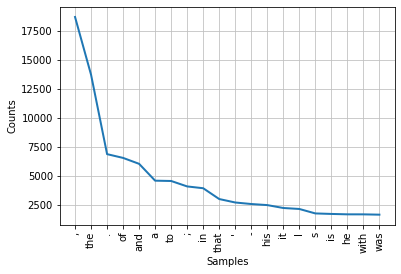

In [ ]:
fdist.plot(20)

In [ ]:
fdist['monster'], fdist['whale'], fdist['wave']

(49, 906, 10)

## Distribuciones sobre contenido con filtro-fino

* Como vimos en la sección anterior, los tokens más frecuentes en un texto no son necesariamente las palabras que mas informacion nos arrojan sobre el contenido del mismo. 
* Por ello, es mejor filtrar y construir distribuciones de frecuencia que no consideren signos de puntuación o caracteres especiales

In [ ]:
# Tal vez sea más interesante estudiar palabras que tengan una longitud minima especifica
long_words = [palabra for palabra in text1 if len(palabra)>5]
vocabulario_filtrado = sorted(set(long_words))
vocabulario_filtrado[:10]

['ACCOUNT',
 'ADDITIONAL',
 'ADVANCING',
 'ADVENTURES',
 'AFFGHANISTAN',
 'AFRICA',
 'AGAINST',
 'ALFRED',
 'ALGERINE',
 'AMERICA']

Podemos ahora construir una lista de tuplas, basados en los conteos ya pre-calculados de la función `FreqDist`, así:

`fdist_filtrado = [('account', 2), ('additional', 32), ('advancing', 5), ...]`

Luego podemos convertir el objeto creado a formato de `np.array`de **Numpy** para poder hacer un sort por palabras mas frecuentes.

`fdist_filtrado = np.array(fdist_filtrado, *args)`

`np.sort(fdist_filtrado, *args) = [('account', 2), ('advancing', 5), ('additional', 32), ...]`

In [ ]:
palabras_interesantes = [(palabra, fdist[palabra]) for palabra in set(text1) if len(palabra)>5 and fdist[palabra]>10]
dtypes = [('word', 'S10'), ('frequency', int)]  # titulos de dtypes : 'word, frecuency'. tipos de dtypes: 'string(S10), int(<i8)'
palabras_interesantes = np.array(palabras_interesantes, dtype=dtypes)
palabras_ordenadas = np.sort(palabras_interesantes, order = 'frequency')  # ordenara segun el titulo 'frecuency' del arreglo numpy 'palabras_interesantes'
palabras_ordenadas[-20:] # top de palabras mas frecuentes

array([(b'between', 117), (b'something', 119), (b'against', 132),
       (b'things', 132), (b'thought', 149), (b'CHAPTER', 150),
       (b'without', 154), (b'Pequod', 172), (b'should', 181),
       (b'almost', 186), (b'Starbuck', 196), (b'himself', 203),
       (b'Captain', 215), (b'through', 227), (b'whales', 237),
       (b'little', 247), (b'Queequeg', 252), (b'seemed', 283),
       (b'before', 293), (b'though', 335)],
      dtype=[('word', 'S10'), ('frequency', '<i8')])

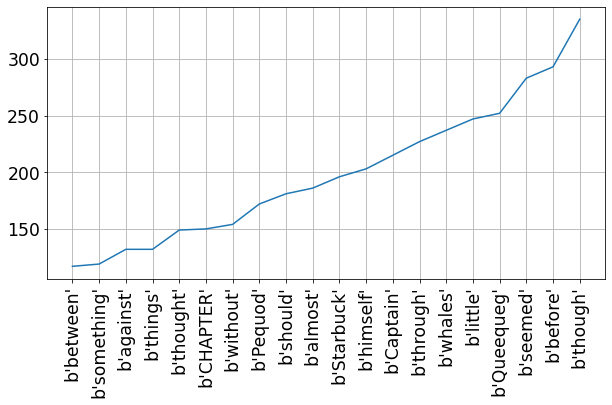

In [ ]:
# Construccion de un grafico de barras customizado con Matplotlib
# https://matplotlib.org/3.1.1/gallery/ticks_and_spines/custom_ticker1.html#sphx-glr-gallery-ticks-and-spines-custom-ticker1-py
top_words = 20
x = np.arange(len(palabras_ordenadas[-top_words:]))
y = [freq[1] for freq in palabras_ordenadas[-top_words:]]
plt.figure(figsize=(10,5))
plt.plot(x, y)
plt.xticks(x, [str(freq[0]) for freq in palabras_ordenadas[-top_words:]], rotation = 'vertical')
plt.tick_params(labelsize = 'xx-large')
plt.grid(True)
plt.show()

* [**Stopwords & word Tokenize**](https://www.geeksforgeeks.org/removing-stop-words-nltk-python)

In [ ]:
from nltk.corpus import stopwords
filter_words = set(stopwords.words('english'))

palabras_interesantes = [(word, fdist[word]) for word in set(text1) if word.lower() not in filter_words and fdist[word] > 5 and len(word) > 2]
dtypes = [('word', 'S10'), ('frequency', int)]
palabras_interesantes = np.array(palabras_interesantes, dtype=dtypes)
palabras_ordenadas = np.sort(palabras_interesantes, order = 'frequency')
palabras_ordenadas[-20:]

array([(b'two', 285), (b'great', 293), (b'still', 299), (b'yet', 300),
       (b'said', 302), (b'long', 318), (b'time', 324), (b'boat', 330),
       (b'head', 335), (b'though', 335), (b'would', 421), (b'sea', 433),
       (b'old', 436), (b'Ahab', 501), (b'ship', 507), (b'man', 508),
       (b'upon', 538), (b'like', 624), (b'one', 889), (b'whale', 906)],
      dtype=[('word', 'S10'), ('frequency', '<i8')])

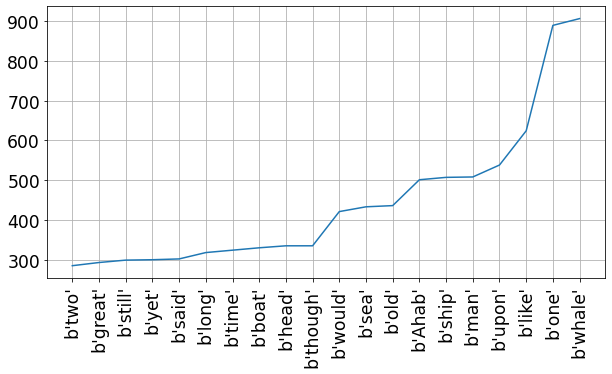

In [ ]:
top_words = 20
x = np.arange(len(palabras_ordenadas[-top_words:]))
y = [freq[1] for freq in palabras_ordenadas[-top_words:]]
plt.figure(figsize=(10,5))
plt.plot(x, y)
plt.xticks(x, [str(freq[0]) for freq in palabras_ordenadas[-top_words:]], rotation = 'vertical')
plt.tick_params(labelsize = 'xx-large')
plt.grid(True)
plt.show()

In [ ]:
from nltk.tokenize import word_tokenize 
example_sent = "This is a sample sentence, showing off the stop words filtration."
w_t = word_tokenize(example_sent)
print(w_t)

['This', 'is', 'a', 'sample', 'sentence', ',', 'showing', 'off', 'the', 'stop', 'words', 'filtration', '.']


# **4. N-gramas y Colocaciones del lenguaje**

El lenguaje es TAN complejo cuando ves estos ejemplos… Qué increíble todo lo que hay que hacer para explicarle a un computador algo que nosotros entendemos tan “naturalmente”.

**N-Gramas:**
* son un cojunto de 2 o más palabras, que son consecutivas.

* Bi-Gramas: 'Estoy aprendiendo cosas interesantes' => (aprendiendo, cosas), (estoy, aprendiendo), (cosas, interesantes).

* Tri-Gramas: 'Estoy aprendiendo cosas interesantes' => (estoy, aprendiendo,  cosas), (aprendiendo, cosas, interesantes).

* etc-Gramas o N-Gramas.

**Colocaciones:**

se elegira una palabra segun la cultura o la forma más cotidiana de decirla.

* Le DIERON ganas de dormir.
* Le INTRODUJERON ganas de dormir.

Se elegira 'DIERON' porque es una palabra que se utiliza frecuentemente en la mayoria de las conversaciones.

*   [Mas sobre Colocaciones con NLTK](http://www.nltk.org/howto/collocations.html)


## Configuración Inicial

In [ ]:
import nltk 
nltk.download('book')
from nltk.book import *
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px

##Bi-gramas
* Parejas de palabras que ocurren consecutivas.

In [ ]:
md_bigrams = list(bigrams(text1))
fdist = FreqDist(md_bigrams)
md_bigrams[:10]

[('[', 'Moby'),
 ('Moby', 'Dick'),
 ('Dick', 'by'),
 ('by', 'Herman'),
 ('Herman', 'Melville'),
 ('Melville', '1851'),
 ('1851', ']'),
 (']', 'ETYMOLOGY'),
 ('ETYMOLOGY', '.'),
 ('.', '(')]

Aqui podemos obtener los bi-gramas más frecuentes en este texto:

In [ ]:
fdist.most_common(10)

[((',', 'and'), 2607),
 (('of', 'the'), 1847),
 (("'", 's'), 1737),
 (('in', 'the'), 1120),
 ((',', 'the'), 908),
 ((';', 'and'), 853),
 (('to', 'the'), 712),
 (('.', 'But'), 596),
 ((',', 'that'), 584),
 (('.', '"'), 557)]

In [ ]:
fdist.plot(20)

### Filtrado de bi-gramas
* Sin embargo, observamos que los bi-gramas más comunes no representan realmente frases o estructuras léxicas de interes.
* Tal vez, aplicar algun tipo de filtro nos permita ver estructuras más relevantes.

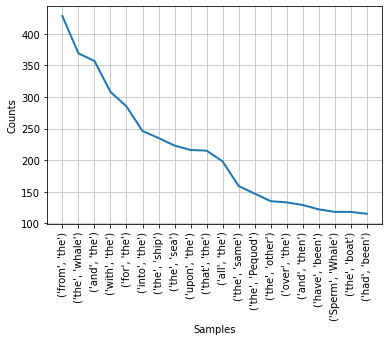

In [ ]:
threshold = 2
filtered_bigrams = [bigram for bigram in md_bigrams if len(bigram[0])>threshold and len(bigram[1])>threshold]
filtered_dist = FreqDist(filtered_bigrams)
filtered_dist.plot(20)

## Tri-gramas

In [ ]:
from nltk.util import ngrams
md_trigrams = list(ngrams(text1,3))  # texto, numero de 'n_gramas'
fdist = FreqDist(md_trigrams)
md_trigrams[:10]

[('[', 'Moby', 'Dick'),
 ('Moby', 'Dick', 'by'),
 ('Dick', 'by', 'Herman'),
 ('by', 'Herman', 'Melville'),
 ('Herman', 'Melville', '1851'),
 ('Melville', '1851', ']'),
 ('1851', ']', 'ETYMOLOGY'),
 (']', 'ETYMOLOGY', '.'),
 ('ETYMOLOGY', '.', '('),
 ('.', '(', 'Supplied')]

In [ ]:
fdist.most_common(10)  # OBVIAMENTE FALTA UN FILTRADO DE PALABRAS IMPORTANTES, ETC.

[((',', 'and', 'the'), 187),
 (('don', "'", 't'), 103),
 (('of', 'the', 'whale'), 101),
 ((',', 'in', 'the'), 93),
 ((',', 'then', ','), 87),
 (('whale', "'", 's'), 81),
 (('.', 'It', 'was'), 81),
 (('ship', "'", 's'), 80),
 (('the', 'Sperm', 'Whale'), 77),
 ((',', 'as', 'if'), 76)]

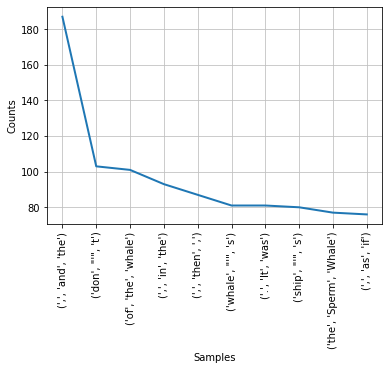

In [ ]:
fdist.plot(10)

## Collocations (Colocaciones)

* Son secuencias de palabras que suelen ocurrir en textos o conversaciones con una **frecuencia inusualmente alta** [NLTK doc](http://www.nltk.org/book/ch01.html)
* Las colocaciones de una palabra son declaraciones formales de donde suele ubicarse tipicamente esa palabra [Manning & Schütze, 1990, Foundations of Statistical Natural Language Processing, Capítulo 6](https://nlp.stanford.edu/fsnlp/)

In [ ]:
md_bigrams = list(bigrams(text1))

threshold = 2
#distribution of bi-grams
filtered_bigrams = [bigram for bigram in md_bigrams if len(bigram[0])>threshold and len(bigram[1])>threshold]
filtered_bigram_dist = FreqDist(filtered_bigrams)
#distribution of words
filtered_words = [word for word in text1 if len(word)>threshold]
filtered_word_dist = FreqDist(filtered_words)

df = pd.DataFrame()
df['bi_gram'] = list(set(filtered_bigrams))
df['word_0'] = df['bi_gram'].apply(lambda x: x[0])
df['word_1'] = df['bi_gram'].apply(lambda x: x[1])
df['bi_gram_freq'] = df['bi_gram'].apply(lambda x: filtered_bigram_dist[x])
df['word_0_freq'] = df['word_0'].apply(lambda x: filtered_word_dist[x])
df['word_1_freq'] = df['word_1'].apply(lambda x: filtered_word_dist[x])
df

bi_gram     word_0  ... word_0_freq  word_1_freq
0          (lurid, woe)      lurid  ...           2           25
1        (are, lashing)        are  ...         586            8
2       (mighty, steed)     mighty  ...          47            4
3         (whole, city)      whole  ...         136           14
4        (offered, the)    offered  ...          12        13721
...                 ...        ...  ...         ...          ...
67937  (endeavors, the)  endeavors  ...           4        13721
67938     (same, watch)       same  ...         213           52
67939     (being, sent)      being  ...         219           16
67940        (The, sun)        The  ...         612          102
67941      (one, often)        one  ...         889           68

[67942 rows x 6 columns]

## Pointwise Mutual Information (PMI)
Una métrica basada en _teoria de la información_ para encontrar **Collocations**.

$$
PMI = \log\left(\frac{P(w_1, w_2)}{P(w_1)P(w_2)}\right)
$$

In [ ]:
df['PMI'] = df[['bi_gram_freq', 'word_0_freq', 'word_1_freq']].apply(lambda x:np.log2(x.values[0]/(x.values[1]*x.values[2])), axis = 1)
df['log(bi_gram_freq)'] = df['bi_gram_freq'].apply(lambda x: np.log2(x))
df

bi_gram     word_0  ...        PMI  log(bi_gram_freq)
0          (lurid, woe)      lurid  ...  -5.643856                0.0
1        (are, lashing)        are  ... -12.194757                0.0
2       (mighty, steed)     mighty  ...  -7.554589                0.0
3         (whole, city)      whole  ... -10.894818                0.0
4        (offered, the)    offered  ... -16.329061                1.0
...                 ...        ...  ...        ...                ...
67937  (endeavors, the)  endeavors  ... -15.744098                0.0
67938     (same, watch)       same  ... -13.435149                0.0
67939     (being, sent)      being  ... -11.774787                0.0
67940        (The, sun)        The  ... -14.929813                1.0
67941      (one, often)        one  ... -15.883502                0.0

[67942 rows x 8 columns]

In [ ]:
df.sort_values(by = 'PMI', ascending=False)

bi_gram       word_0  ...        PMI  log(bi_gram_freq)
19206            (HORRID, ASPECT)       HORRID  ...   0.000000                0.0
53803    (bountifully, laughable)  bountifully  ...   0.000000                0.0
40202  (decidedly, objectionable)    decidedly  ...   0.000000                0.0
55884             (worldly, ties)      worldly  ...   0.000000                0.0
23206         (arrantest, topers)    arrantest  ...   0.000000                0.0
...                           ...          ...  ...        ...                ...
60231                  (man, the)          man  ... -22.732783                0.0
10037                 (some, the)         some  ... -22.919024                0.0
59350                  (one, the)          one  ... -23.540138                0.0
64599                  (the, not)          the  ... -23.851315                0.0
47031                  (the, but)          the  ... -23.864336                0.0

[67942 rows x 8 columns]

In [ ]:
fig = px.scatter(x = df['PMI'].values, y = df['log(bi_gram_freq)'].values, color = df['PMI']+df['log(bi_gram_freq)'], 
                 size = (df['PMI']+df['log(bi_gram_freq)']).apply(lambda x: 1/(1+abs(x))).values, 
                 hover_name = df['bi_gram'].values, width = 600, height = 600, labels = {'x': 'PMI', 'y': 'Log(Bigram Frequency)'})
fig.show()

## Medidas pre-construidas en NLTK

In [ ]:
# ver documentación https://www.nltk.org/_modules/nltk/metrics/association.html
from nltk.collocations import *
bigram_measures = nltk.collocations.BigramAssocMeasures()  # metodo de metricas donde esta incluido el PMI.
finder = BigramCollocationFinder.from_words(text1)  # objeto q nos permite usar los anterior metodos rudimentarios(set, list, for, etc.).

In [ ]:
finder.apply_freq_filter(20)   # umbral o que solo las palabras que tengan una repeticion mayor a '20' seran elegidas.
finder.nbest(bigram_measures.pmi, 10)  # nos mostrar las '10' mejores colocaciones según la metrica de 'bigram_measures.pmi'

[('Moby', 'Dick'),
 ('Sperm', 'Whale'),
 ('White', 'Whale'),
 ('Right', 'Whale'),
 ('Captain', 'Peleg'),
 (',"', 'said'),
 ('never', 'mind'),
 ('!"', 'cried'),
 ('no', 'means'),
 ('each', 'other')]

## Textos en Español 

In [ ]:
# descargamos corpus en español  https://mailman.uib.no/public/corpora/2007-October/005448.html
nltk.download('cess_esp')
corpus = nltk.corpus.cess_esp.sents() 
flatten_corpus = [w for l in corpus for w in l]

[nltk_data] Downloading package cess_esp to /root/nltk_data...
[nltk_data]   Unzipping corpora/cess_esp.zip.


In [ ]:
print(corpus[0])

In [ ]:
print(flatten_corpus[:50])

['El', 'grupo', 'estatal', 'Electricité_de_France', '-Fpa-', 'EDF', '-Fpt-', 'anunció', 'hoy', ',', 'jueves', ',', 'la', 'compra', 'del', '51_por_ciento', 'de', 'la', 'empresa', 'mexicana', 'Electricidad_Águila_de_Altamira', '-Fpa-', 'EAA', '-Fpt-', ',', 'creada', 'por', 'el', 'japonés', 'Mitsubishi_Corporation', 'para', 'poner_en_marcha', 'una', 'central', 'de', 'gas', 'de', '495', 'megavatios', '.', 'Una', 'portavoz', 'de', 'EDF', 'explicó', 'a', 'EFE', 'que', 'el', 'proyecto']


In [ ]:
finder = BigramCollocationFinder.from_documents(corpus)
finder.apply_freq_filter(10)
finder.nbest(bigram_measures.pmi, 10)

[('señora', 'Aguirre'),
 ('secretario', 'general'),
 ('elecciones', 'generales'),
 ('campaña', 'electoral'),
 ('quiere', 'decir'),
 ('Se', 'trata'),
 ('segunda', 'vuelta'),
 ('director', 'general'),
 ('primer', 'ministro'),
 ('primer', 'lugar')]

# **5. Introducción a los recursos léxicos**

Categorias lexicas:

* calle [verbo] : se refiere a la conjugacion del verbo 'callar'.
* calle [sustantivo] : que se refiere a un espacio publico donde se transita.
* Donde 'verbo' y 'sustantivo' son llamadas categorias lexicas, y su significado contextual nos indican donde y cuando usarlas.

In [ ]:
import nltk 
nltk.download('book')
from nltk.book import *
from nltk.corpus import stopwords

## Recursos léxicos (lexicons)

*   Son colecciones de palabras o frases que tienen asociadas etiquetas o meta-informacion de algún tipo (POS tags, significados gramaticales, etc ...)

**comentario:** POS (Part of Speech), también llamado etiquetado gramatical o etiquetado de palabras por categorias, consiste en etiquetar la categoria gramatical a la que pertence cada palabra en un volumen de texto, siendo las categorias: 

1.   Sustantivos
2.   Adjetivos
3.   Articulos
4.   Pronombres
5.   Verbos
6.   Adverbios
7.   Interjecciones
8.   Preposiciones
9.   Conjunciones

In [ ]:
# Vocabularios: palabras únicas en un corpus
vocab = sorted(set(text1))

In [ ]:
# Distribuciones: frecuencia de aparición
word_freq = FreqDist(text1)

In [ ]:
# Stopwords: Palabras muy usadas en el lenguaje que usualmente son filtradas en un pipeline de NLP (useless words)
print(stopwords.words('spanish'))

['de', 'la', 'que', 'el', 'en', 'y', 'a', 'los', 'del', 'se', 'las', 'por', 'un', 'para', 'con', 'no', 'una', 'su', 'al', 'lo', 'como', 'más', 'pero', 'sus', 'le', 'ya', 'o', 'este', 'sí', 'porque', 'esta', 'entre', 'cuando', 'muy', 'sin', 'sobre', 'también', 'me', 'hasta', 'hay', 'donde', 'quien', 'desde', 'todo', 'nos', 'durante', 'todos', 'uno', 'les', 'ni', 'contra', 'otros', 'ese', 'eso', 'ante', 'ellos', 'e', 'esto', 'mí', 'antes', 'algunos', 'qué', 'unos', 'yo', 'otro', 'otras', 'otra', 'él', 'tanto', 'esa', 'estos', 'mucho', 'quienes', 'nada', 'muchos', 'cual', 'poco', 'ella', 'estar', 'estas', 'algunas', 'algo', 'nosotros', 'mi', 'mis', 'tú', 'te', 'ti', 'tu', 'tus', 'ellas', 'nosotras', 'vosotros', 'vosotras', 'os', 'mío', 'mía', 'míos', 'mías', 'tuyo', 'tuya', 'tuyos', 'tuyas', 'suyo', 'suya', 'suyos', 'suyas', 'nuestro', 'nuestra', 'nuestros', 'nuestras', 'vuestro', 'vuestra', 'vuestros', 'vuestras', 'esos', 'esas', 'estoy', 'estás', 'está', 'estamos', 'estáis', 'están', 'e

### Fraccion de Stopwords en un corpus

In [ ]:
def stopwords_percentage(text):
  '''
  aqui usamos un recurso léxico (stopwords) para filtrar un corpus
  '''
  stopwd = stopwords.words('english')
  content = [w  for w in text if w.lower() not in stopwd]

  n_stopwd = len(content)/len(text)   # porcentaje de palabras que no pertenecen a stopwords.
  stopwd = 1- n_stopwd  # porcentaje de stopwords en el texto.  # 100% - porcentaje_no_stopwords.
  return stopwd, n_stopwd

a, b = stopwords_percentage(text1)
print("% stopwords {}, and % not stopwords {}.".format(a,b))

% stopwords 0.4137045230600531, and % not stopwords 0.5862954769399469.


### Lexicons enriquecidos (listas comparativas de palabras) "swadesh"

*   Construyendo diccionarios para traduccion de palabras en diferentes idiomas. 


In [ ]:
from nltk.corpus import swadesh
#idiomas disponibles
print(swadesh.fileids())

['be', 'bg', 'bs', 'ca', 'cs', 'cu', 'de', 'en', 'es', 'fr', 'hr', 'it', 'la', 'mk', 'nl', 'pl', 'pt', 'ro', 'ru', 'sk', 'sl', 'sr', 'sw', 'uk']


In [ ]:
print(swadesh.words('en'))

In [ ]:
fr2es = swadesh.entries(['fr', 'es'])
print(fr2es)

In [ ]:
translate = dict(fr2es)
translate['chien']

'perro'

In [ ]:
translate['jeter']

'tirar'

## WordNet

Un synset es un conjunto de palabras que son sinónimas o que se pueden generalizar con un concepto.

La idea del Wordnet es tener una estructura tipo grafo.

Un synset se relaciona con otro synset dependiendo de la generalidad del concepto.

Conceptos claves:

* Hiperonimo: Es un synset mas generalizado que puede abarcar varias palabras. El ejemplo de la clase es que Artefacto es un hiperónimo de vehículo motorizado, o Sentimientos es un hiperonimo de felicidad, alegria, tristeza, etc.

* Hiponimo: Es un synset que no es general sino más específico, futbol, basquet, tenis, son hiponimos de deporte.

**NOTA:** WordNet Fue remplazado en la actualidad por las redes neuoranales o NN.

### Referencias 

* [WordNet Lecture](https://sp1718.github.io/wordnet_lecture.pdf)
* [What is WordNet?](https://wordnet.princeton.edu)
* [WordNet Interface NLTK](http://www.nltk.org/howto/wordnet.html)
* [LAS-WordNet](https://www.datos.gov.co/Ciencia-Tecnolog-a-e-Innovaci-n/LAS-WordNet-una-WordNet-para-el-espa-ol-obtenida-c/8z8d-85m7)



In [ ]:
nltk.download('omw')
from nltk.corpus import wordnet as wn

[nltk_data] Downloading package omw to /root/nltk_data...
[nltk_data]   Unzipping corpora/omw.zip.


In [ ]:
# synset: grupo de sinómimos de una palabra.
ss = wn.synsets('carro', lang='spa')
ss

[Synset('car.n.01'),
 Synset('carriage.n.04'),
 Synset('carrier.n.02'),
 Synset('cart.n.01'),
 Synset('chariot.n.02'),
 Synset('cartload.n.01')]

In [ ]:
# explorando los synsets
for syn in ss:
  print(syn.name(), ': ', syn.definition())
  for name in syn.lemma_names():
    print(' * ', name)

car.n.01 :  a motor vehicle with four wheels; usually propelled by an internal combustion engine
 *  car
 *  auto
 *  automobile
 *  machine
 *  motorcar
carriage.n.04 :  a machine part that carries something else
 *  carriage
carrier.n.02 :  a self-propelled wheeled vehicle designed specifically to carry something
 *  carrier
cart.n.01 :  a heavy open wagon usually having two wheels and drawn by an animal
 *  cart
chariot.n.02 :  a two-wheeled horse-drawn battle vehicle; used in war and races in ancient Egypt and Greece and Rome
 *  chariot
cartload.n.01 :  the quantity that a cart holds
 *  cartload


In [ ]:
# visualization references
# * http://www.randomhacks.net/2009/12/29/visualizing-wordnet-relationships-as-graphs/
# * http://dlacombejr.github.io/programming/2015/09/28/visualizing-cifar-10-categories-with-wordnet-and-networkx.html

import networkx as nx
import matplotlib.pyplot as plt

def closure_graph(synset, fn):
    seen = set()
    graph = nx.DiGraph()
    labels = {}

    def recurse(s):
        if not s in seen:
            seen.add(s)
            labels[s.name] = s.name().split('.')[0]
            graph.add_node(s.name)
            for s1 in fn(s):
                graph.add_node(s1.name)
                graph.add_edge(s.name, s1.name)
                recurse(s1)

    recurse(synset)
    return graph, labels

def draw_text_graph(G, labels):
    plt.figure(figsize=(18,12))
    pos = nx.planar_layout(G, scale=18)
    nx.draw_networkx_nodes(G, pos, node_color="red", linewidths=0, node_size=500)
    nx.draw_networkx_labels(G, pos, font_size=20, labels=labels)
    nx.draw_networkx_edges(G, pos)
    plt.xticks([])
    plt.yticks([])

### **Hyponyms:** Conceptos que son más especificos que la palabra raiz de la cual derivan.

Un hiperónimo es una manera más general de referirse a algo. Por ejemplo, deporte es hiperónimo de fútbol, tenis, montañismo y natación. Un hipónimo es una manera más específica de referirse a algo. Por ejemplo, fútbol, tenis, montañismo y natación son hipónimos de la palabra deporte.

In [ ]:
ss[0].hyponyms()

[Synset('ambulance.n.01'),
 Synset('beach_wagon.n.01'),
 Synset('bus.n.04'),
 Synset('cab.n.03'),
 Synset('compact.n.03'),
 Synset('convertible.n.01'),
 Synset('coupe.n.01'),
 Synset('cruiser.n.01'),
 Synset('electric.n.01'),
 Synset('gas_guzzler.n.01'),
 Synset('hardtop.n.01'),
 Synset('hatchback.n.01'),
 Synset('horseless_carriage.n.01'),
 Synset('hot_rod.n.01'),
 Synset('jeep.n.01'),
 Synset('limousine.n.01'),
 Synset('loaner.n.02'),
 Synset('minicar.n.01'),
 Synset('minivan.n.01'),
 Synset('model_t.n.01'),
 Synset('pace_car.n.01'),
 Synset('racer.n.02'),
 Synset('roadster.n.01'),
 Synset('sedan.n.01'),
 Synset('sport_utility.n.01'),
 Synset('sports_car.n.01'),
 Synset('stanley_steamer.n.01'),
 Synset('stock_car.n.01'),
 Synset('subcompact.n.01'),
 Synset('touring_car.n.01'),
 Synset('used-car.n.01')]

car.n.01


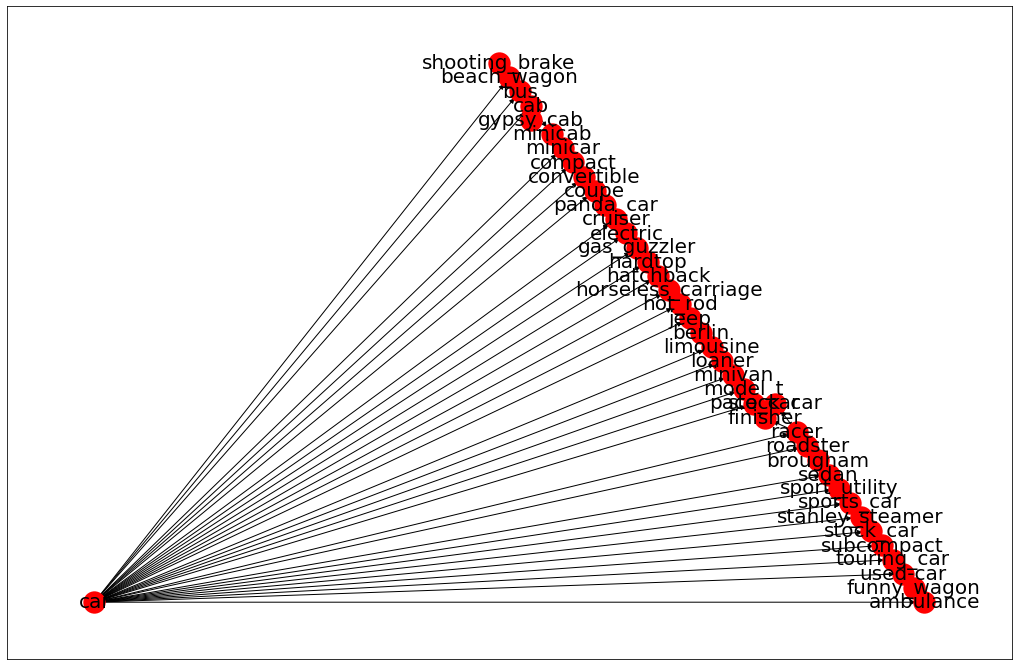

In [ ]:
print(ss[0].name())
G, labels = closure_graph(ss[0], fn = lambda s: s.hyponyms())
draw_text_graph(G, labels)

### **Hypernyms**: conceptos que son mas generales !

Los hiperónimos son palabras cuyo significado abarca al de otras palabras. Por ejemplo, la palabra flores es un hiperónimo porque su significado abarca a las rosas, los claveles, las margaritas. ... Por ejemplo, la palabra pájaro es un hiperónimo de las palabras golondrinas, colibríes, canarios.

In [ ]:
ss[0].hypernyms()

[Synset('motor_vehicle.n.01')]

car.n.01


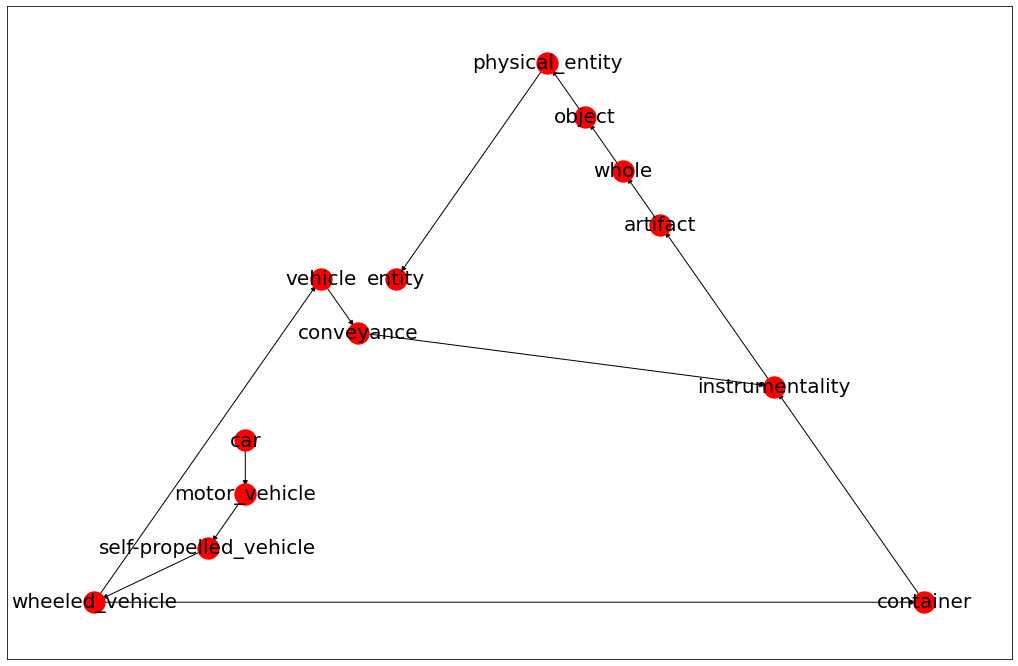

In [ ]:
print(ss[0].name())
G, labels = closure_graph(ss[0], fn = lambda s: s.hypernyms())
draw_text_graph(G, labels)

* nos serviria a como, ... ejemplo: CAR, queremos saber una palabra que este relacionada con este lo más cercana posible, la cual sería MOTOR_VEHICLE, no seria SELF_POR... porque esta a 2 aristas de distancia. Así podriamos elegir a la mejor opción para predecir una palabra diferente a la que le enviamos:

SUPER EJEMPLO_: la busqueda de google, ponemos apenas el principio de la palabra y ya nos esta dando posibles palabras o similares palabras a la que estamos buscando.

### Similitud Semántica


In [ ]:
def show_syns(word, language = 'spa'):
  ss = wn.synsets(word, lang= language)
  for syn in ss:
    print(syn.name(), ': ', syn.definition())
    for name in syn.lemma_names():
      print(' * ', name)
  return ss

In [ ]:
ss = show_syns('perro')

dog.n.01 :  a member of the genus Canis (probably descended from the common wolf) that has been domesticated by man since prehistoric times; occurs in many breeds
 *  dog
 *  domestic_dog
 *  Canis_familiaris
rotter.n.01 :  a person who is deemed to be despicable or contemptible
 *  rotter
 *  dirty_dog
 *  rat
 *  skunk
 *  stinker
 *  stinkpot
 *  bum
 *  puke
 *  crumb
 *  lowlife
 *  scum_bag
 *  so-and-so
 *  git


In [ ]:
ss2 = show_syns('gato')

cat.n.01 :  feline mammal usually having thick soft fur and no ability to roar: domestic cats; wildcats
 *  cat
 *  true_cat
tom.n.02 :  male cat
 *  tom
 *  tomcat
dodger.n.01 :  a shifty deceptive person
 *  dodger
 *  fox
 *  slyboots


In [ ]:
ss3 = show_syns('animal')

animal.n.01 :  a living organism characterized by voluntary movement
 *  animal
 *  animate_being
 *  beast
 *  brute
 *  creature
 *  fauna
beast.n.02 :  a cruelly rapacious person
 *  beast
 *  wolf
 *  savage
 *  brute
 *  wildcat
dunce.n.01 :  a stupid person; these words are used to express a low opinion of someone's intelligence
 *  dunce
 *  dunderhead
 *  numskull
 *  blockhead
 *  bonehead
 *  lunkhead
 *  hammerhead
 *  knucklehead
 *  loggerhead
 *  muttonhead
 *  shithead
 *  dumbass
 *  fuckhead


In [ ]:
perro = ss[0]
gato = ss2[0]
animal = ss3[0]

In [ ]:
# similitud entre 'animal' y 'perro'
animal.path_similarity(perro)

0.3333333333333333

In [ ]:
# similitud entre 'animal' y 'gato'
animal.path_similarity(gato)

0.125

In [ ]:
perro.path_similarity(gato)

0.2

In [ ]:
perro.path_similarity(perro)

1.0

In [ ]:
import matplotlib.pyplot as plt
from networkx.drawing.nx_agraph import graphviz_layout
import networkx as nx

def traverse(graph, start, node):
  graph.depth[node.name] = node.shortest_path_distance(start)
  for child in node.hyponyms():
    graph.add_edge(node.name, child.name)
    traverse(graph, start, child)

def hyponym_graph(start):
  G = nx.Graph()
  G.depth = {}
  traverse(G, start, start)
  return G

def graph_draw(graph):
  nx.draw(graph, 
                   node_size = [16*graph.degree(n) for n in graph], 
                   node_color = [graph.depth[n] for n in graph], 
                   with_labels = True)
  plt.show()

In [ ]:
dog = wn.synset('dog.n.01')
graph = hyponym_graph(dog)
graph_draw(graph)

# **6. Procesamiento de texto plano desde Web**




## Configuración inicial

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk import word_tokenize
from urllib import request

## Procesar texto plano desde Web

In [ ]:
url = "http://www.gutenberg.org/files/2554/2554-0.txt"
response = request.urlopen(url)
raw = response.read().decode('utf8')

In [ ]:
raw

In [ ]:
with open('book.txt', 'w')as f:
  f.write(raw)

In [ ]:
len(raw)

1176967

In [ ]:
tokens = word_tokenize(raw)
print(tokens[:20])

['\ufeffThe', 'Project', 'Gutenberg', 'EBook', 'of', 'Crime', 'and', 'Punishment', ',', 'by', 'Fyodor', 'Dostoevsky', 'This', 'eBook', 'is', 'for', 'the', 'use', 'of', 'anyone']


In [ ]:
from nltk.corpus import stopwords
stopwd = stopwords.words("english")
tokens = [w for w in tokens if w.lower() not in stopwd]
print(tokens)

In [ ]:
tokens.pop(0)
print(tokens)

In [ ]:
text = nltk.Text(tokens)
text.collocations()

Katerina Ivanovna; Pyotr Petrovitch; Pulcheria Alexandrovna; Avdotya
Romanovna; Rodion Romanovitch; Marfa Petrovna; Sofya Semyonovna; old
woman; Project Gutenberg-tm; Porfiry Petrovitch; Amalia Ivanovna;
great deal; Nikodim Fomitch; young man; Ilya Petrovitch; Project
Gutenberg; Hay Market; Andrey Semyonovitch; Dmitri Prokofitch; Good
heavens


## Procesar HTML 

In [ ]:
import requests
from bs4 import BeautifulSoup
import re
from nltk.tokenize import RegexpTokenizer
url = 'https://www.gutenberg.org/files/2701/2701-h/2701-h.htm'
r = requests.get(url)

In [ ]:
html = r.text
html 

In [ ]:
soup = BeautifulSoup(html, 'html.parser')
soup

In [ ]:
text = soup.get_text()
text

In [ ]:
!pip install -q html2text
import html2text
to_text = html2text.html2text(html)
print(to_text)

tokens = re.findall('\w+', to_text)
tokens[:50]

In [ ]:
len(tokens)

222698

In [ ]:
tokens = re.findall('\w+', text)
tokens[:10]

['Moby',
 'Dick',
 'Or',
 'the',
 'Whale',
 'by',
 'Herman',
 'Melville',
 'body',
 'background']

In [ ]:
tokenizer = RegexpTokenizer('\w+')
tokens = tokenizer.tokenize(text)
tokens = [token.lower() for token in tokens]
tokens[:10]

['moby',
 'dick',
 'or',
 'the',
 'whale',
 'by',
 'herman',
 'melville',
 'body',
 'background']

In [ ]:
text = nltk.Text(tokens)
text.collocations()

sperm whale; moby dick; project gutenberg; white whale; old man; mast
head; mast heads; captain ahab; right whale; quarter deck; aye aye;
captain peleg; new bedford; literary archive; mrs hussey; dough boy;
chief mate; try works; cape horn; archive foundation


## Google Drive

### Configuracion inicial

In [ ]:
from google.colab import drive   # importar nuestra data base de DRIVE, Genial
drive.mount('/content/drive')
filepath = '/content/drive/My Drive/data/'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Parte 1:

In [ ]:
import re

# la funcion la podemos definir en el notebook y usar directamente
def get_text(file):
  '''Read Text from file'''
  text = open(file).read()
  text = re.sub(r'<.*?>', ' ', text)  # (en vez de, remplazo, en)
  text = re.sub(r'\s+', ' ', text)
  return text

In [ ]:
text = get_text(filepath+'book.txt')
text

In [ ]:
# será mas comodo definir la funcion dentro de una libreria externa
!touch /content/drive/My\ Drive/data/read.py  # se pone el "My\ Drive" porque es una terminal y no acepta espacio. y el "\ " es un la representacion de un espacio o " ".

In [ ]:
import sys   
sys.path.append(filepath)   #al sistema agregamos nuestro path del Drive
import read  # que es el nombre del documento.py en nuestro Drive
read.get_text(filepath+'book.txt')    # modulo.funcion(parametros) desde nuestro Drive

### Ejemplo 2: 

In [ ]:
import nltk
nltk.download('punkt')
from urllib import request
from bs4 import BeautifulSoup
from nltk import word_tokenize

# la funcion la podemos definir en el notebook y usar directamente
def freq_words(url, n, encoding = 'utf8'):
  req = request.urlopen(url)
  html = req.read().decode(encoding)
  raw = BeautifulSoup(html, 'html.parser')
  text = raw.get_text()
  tokens = word_tokenize(text)
  tokens = [t.lower() for t in tokens]
  fd = nltk.FreqDist(tokens)
  return [t for (t, _) in fd.most_common(n)]

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
freq_words('https://www.gutenberg.org/files/2701/2701-h/2701-h.htm', 20)

[',',
 'the',
 '.',
 'of',
 'and',
 'a',
 'to',
 ';',
 'in',
 'that',
 '’',
 'his',
 'it',
 'i',
 'he',
 's',
 'but',
 '!',
 'with',
 'is']

In [ ]:
# será mas comodo definir la funcion dentro de una libreria externa
!touch /content/drive/My\ Drive/data/nlp_utils.py

In [ ]:
import nlp_utils   # nuestro archivo.py creado por nosotros
nlp_utils.freq_words('https://www.gutenberg.org/files/2701/2701-h/2701-h.htm', 20)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


[',',
 'the',
 '.',
 'of',
 'and',
 'a',
 'to',
 ';',
 'in',
 'that',
 '’',
 'his',
 'it',
 'i',
 'he',
 's',
 'but',
 '!',
 'with',
 'is']

# **7. team**

In [ ]:
from nltk.probability import FreqDist
ll = ['vamos', 'a', 'ver', 'a', 'que', 'tipo', 'de', 'moneda', 'vamos', 'a', 'convertir']

fdist = FreqDist(ll)
fdist.most_common(2)

[('a', 3), ('vamos', 2)]